In [8]:
import numpy as np 
import pandas as pd 
import missingno as msno
import matplotlib.pyplot as plt

import seaborn as sns

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/unlock-profits-with-e-commerce-sales-data/Amazon Sale Report.csv
/kaggle/input/unlock-profits-with-e-commerce-sales-data/Cloud Warehouse Compersion Chart.csv
/kaggle/input/unlock-profits-with-e-commerce-sales-data/May-2022.csv
/kaggle/input/unlock-profits-with-e-commerce-sales-data/P  L March 2021.csv
/kaggle/input/unlock-profits-with-e-commerce-sales-data/International sale Report.csv
/kaggle/input/unlock-profits-with-e-commerce-sales-data/Expense IIGF.csv
/kaggle/input/unlock-profits-with-e-commerce-sales-data/Sale Report.csv


In [9]:
df = pd.read_csv ("/kaggle/input/unlock-profits-with-e-commerce-sales-data/Amazon Sale Report.csv", index_col=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 128975 entries, 0 to 128974
Data columns (total 23 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Order ID            128975 non-null  object 
 1   Date                128975 non-null  object 
 2   Status              128975 non-null  object 
 3   Fulfilment          128975 non-null  object 
 4   Sales Channel       128975 non-null  object 
 5   ship-service-level  128975 non-null  object 
 6   Style               128975 non-null  object 
 7   SKU                 128975 non-null  object 
 8   Category            128975 non-null  object 
 9   Size                128975 non-null  object 
 10  ASIN                128975 non-null  object 
 11  Courier Status      122103 non-null  object 
 12  Qty                 128975 non-null  int64  
 13  currency            121180 non-null  object 
 14  Amount              121180 non-null  float64
 15  ship-city           128942 non-nul

<AxesSubplot:>

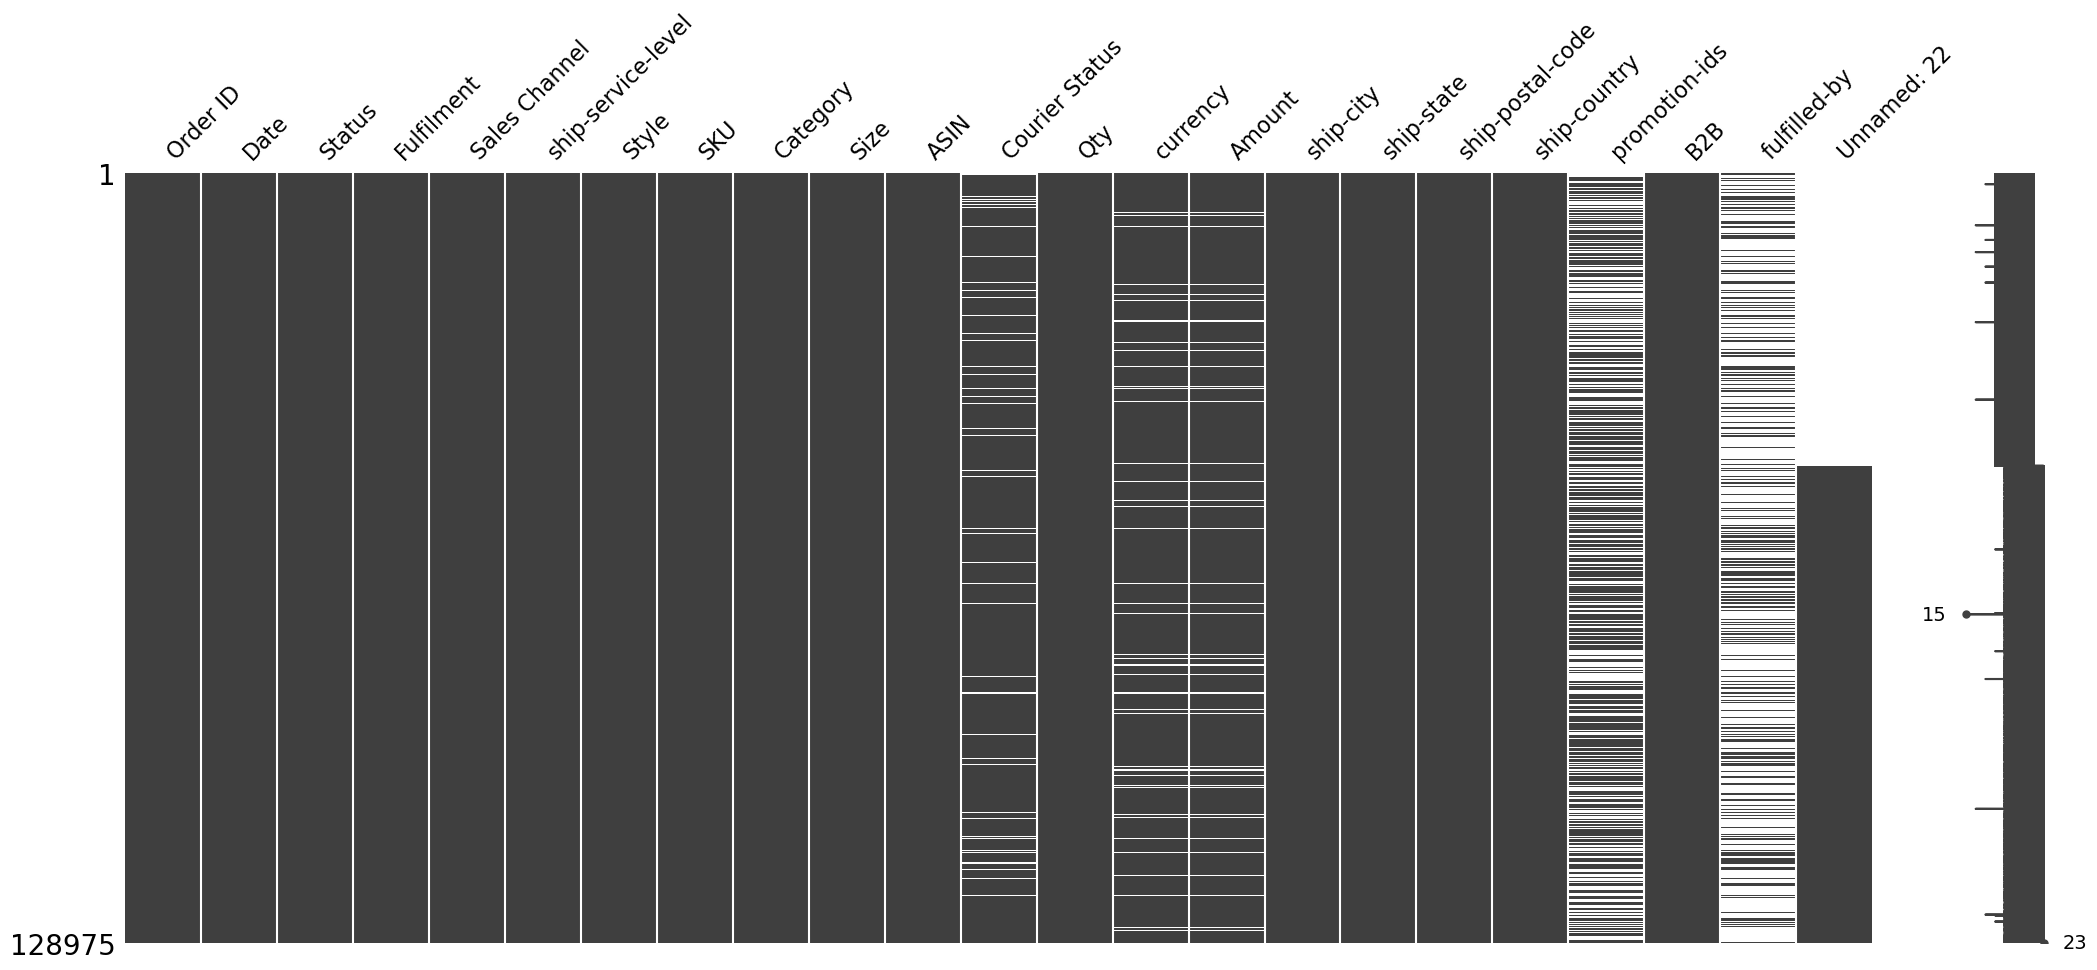

In [10]:
msno.matrix(df)


<AxesSubplot:>

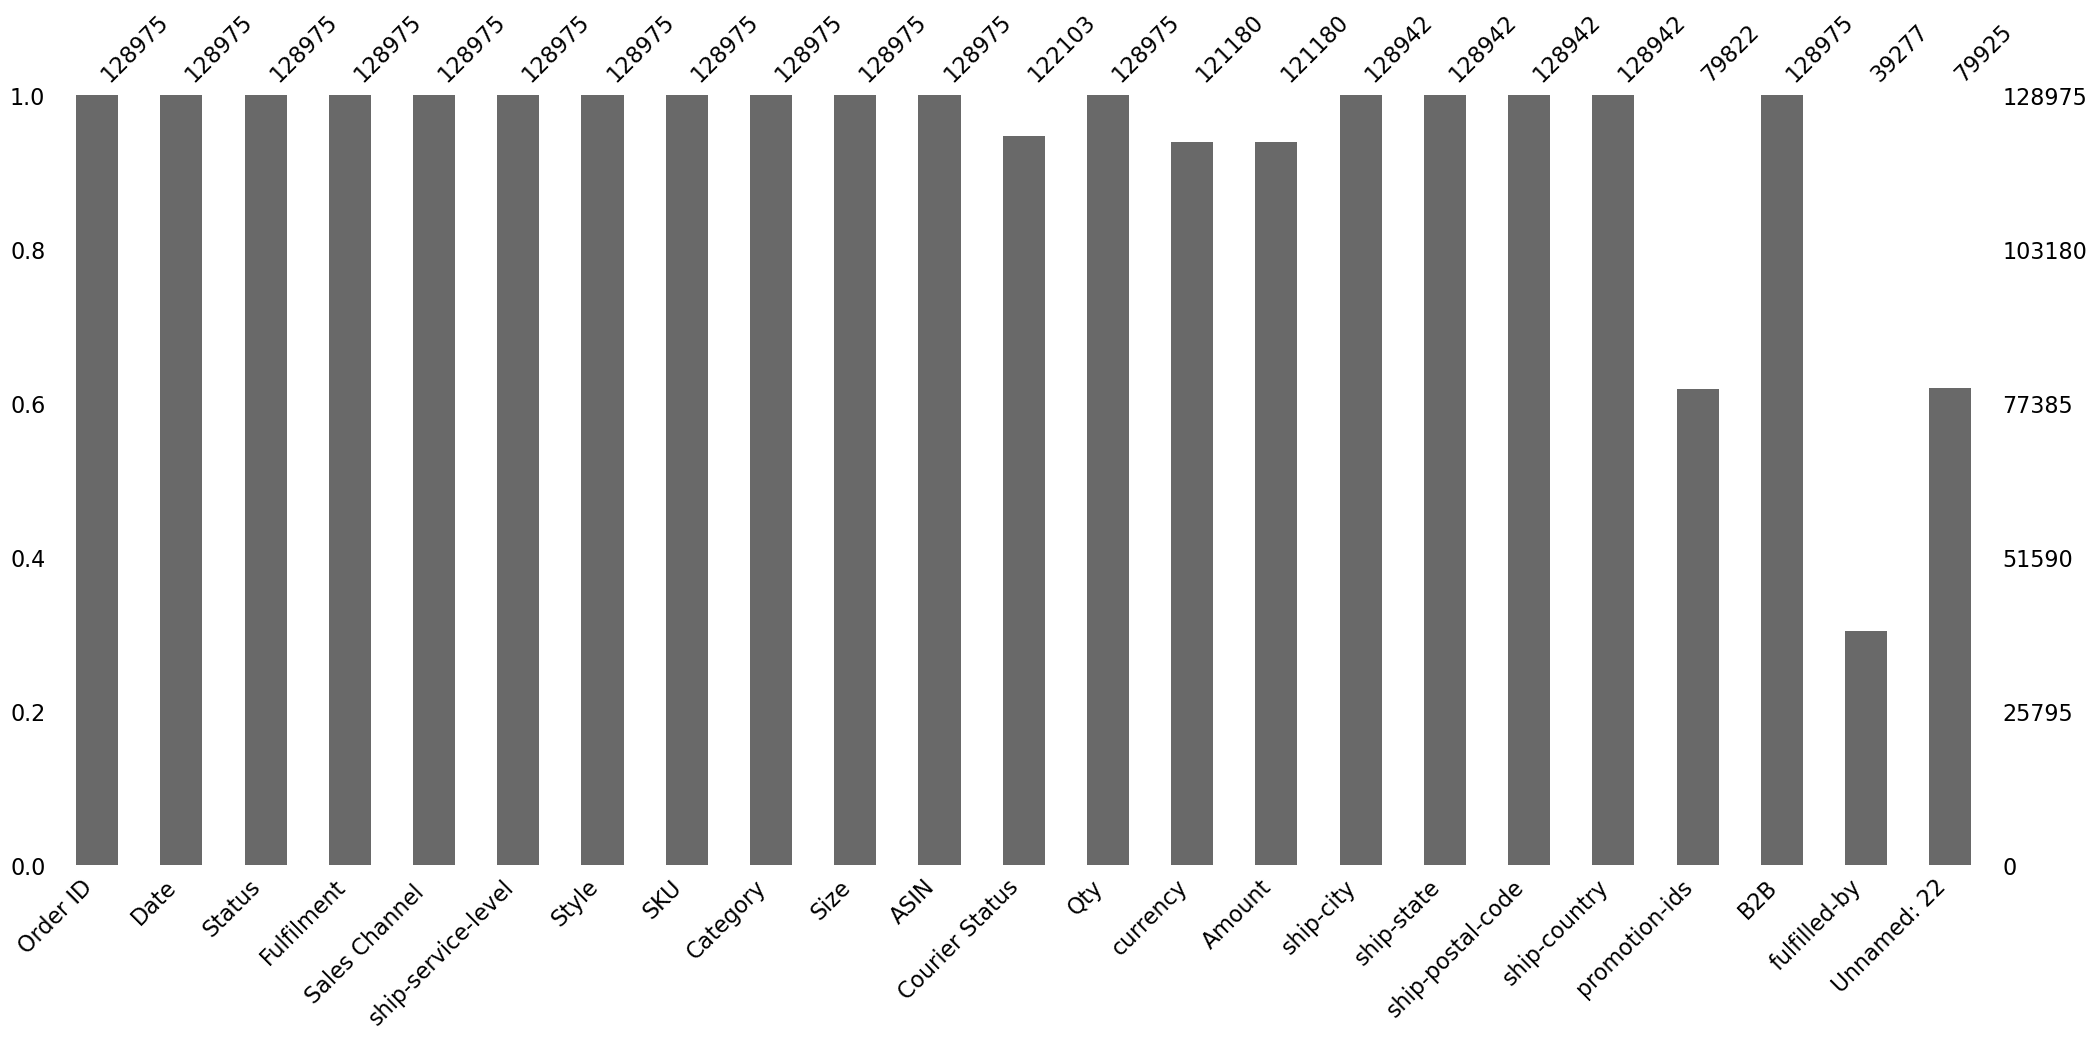

In [11]:
msno.bar(df)


In [12]:
df.nunique()

Order ID              120378
Date                      91
Status                    13
Fulfilment                 2
Sales Channel              2
ship-service-level         2
Style                   1377
SKU                     7195
Category                   9
Size                      11
ASIN                    7190
Courier Status             3
Qty                       10
currency                   1
Amount                  1410
ship-city               8955
ship-state                69
ship-postal-code        9459
ship-country               1
promotion-ids           5787
B2B                        2
fulfilled-by               1
Unnamed: 22                1
dtype: int64

In [18]:
df.drop(columns = ['Unnamed: 22','fulfilled-by','ship-country', 'currency','Sales Channel '],inplace = True)


KeyError: "['Unnamed: 22' 'fulfilled-by' 'ship-country' 'currency' 'Sales Channel '] not found in axis"

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 128975 entries, 0 to 128974
Data columns (total 18 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Order ID            128975 non-null  object 
 1   Date                128975 non-null  object 
 2   Status              128975 non-null  object 
 3   Fulfilment          128975 non-null  object 
 4   ship-service-level  128975 non-null  object 
 5   Style               128975 non-null  object 
 6   SKU                 128975 non-null  object 
 7   Category            128975 non-null  object 
 8   Size                128975 non-null  object 
 9   ASIN                128975 non-null  object 
 10  Courier Status      122103 non-null  object 
 11  Qty                 128975 non-null  int64  
 12  Amount              121180 non-null  float64
 13  ship-city           128942 non-null  object 
 14  ship-state          128942 non-null  object 
 15  ship-postal-code    128942 non-nul

In [20]:
print(f'Tamaño del set antes de eliminar las filas repetidas: {df.shape}')
df.drop_duplicates(inplace=True)
print(f'Tamaño del set después de eliminar las filas repetidas: {df.shape}')

Tamaño del set antes de eliminar las filas repetidas: (128975, 18)
Tamaño del set después de eliminar las filas repetidas: (128969, 18)


In [21]:
df[df.isnull().any(axis = 1)]


,Order ID,Date,Status,Fulfilment,ship-service-level,Style,SKU,Category,Size,ASIN,Courier Status,Qty,Amount,ship-city,ship-state,ship-postal-code,promotion-ids,B2B
index,,,,,,,,,,,,,,,,,,
0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Standard,SET389,SET389-KR-NP-S,Set,S,B09KXVBD7Z,NaN,0,647.62,MUMBAI,MAHARASHTRA,400081.0,NaN,False
3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Standard,J0341,J0341-DR-L,Western Dress,L,B099NRCT7B,NaN,0,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,NaN,False
4,407-1069790-7240320,04-30-22,Shipped,Amazon,Expedited,JNE3671,JNE3671-TU-XXXL,Top,3XL,B098714BZP,Shipped,1,574.00,CHENNAI,TAMIL NADU,600073.0,NaN,False
8,407-5443024-5233168,04-30-22,Cancelled,Amazon,Expedited,SET200,SET200-KR-NP-A-XXXL,Set,3XL,B08L91ZZXN,Cancelled,0,NaN,HYDERABAD,TELANGANA,500008.0,IN Core Free Shipping 2015/04/08 23-48-5-108,False
9,402-4393761-0311520,04-30-22,Shipped,Amazon,Expedited,JNE3461,JNE3461-KR-XXL,kurta,XXL,B08B3XF5MH,Shipped,1,363.00,Chennai,TAMIL NADU,600041.0,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128966,406-9812666-2474761,05-31-22,Shipped,Amazon,Expedited,SET224,SET224-KR-NP-XS,Set,XS,B08MXDBRK1,Shipped,1,1132.00,CHENNAI 600042,TAMIL NADU,600042.0,NaN,False
128967,404-5182288-1653947,05-31-22,Cancelled,Amazon,Expedited,JNE3638,JNE3638-KR-XS,kurta,XS,B09814Q3QH,Cancelled,0,NaN,Kolkata,WEST BENGAL,700040.0,NaN,False
128969,404-3802633-7250760,05-31-22,Cancelled,Amazon,Expedited,SET044,SET044-KR-NP-M,Set,M,B07Q2RTSFB,Unshipped,1,612.00,MUMBAI,MAHARASHTRA,400017.0,NaN,False


In [27]:
df['promotion-ids'].fillna('no promotion', inplace = True)


In [28]:
df['Courier Status'].fillna('unknown', inplace = True)

In [29]:
df['Amount'].fillna(0, inplace = True)

<AxesSubplot:>

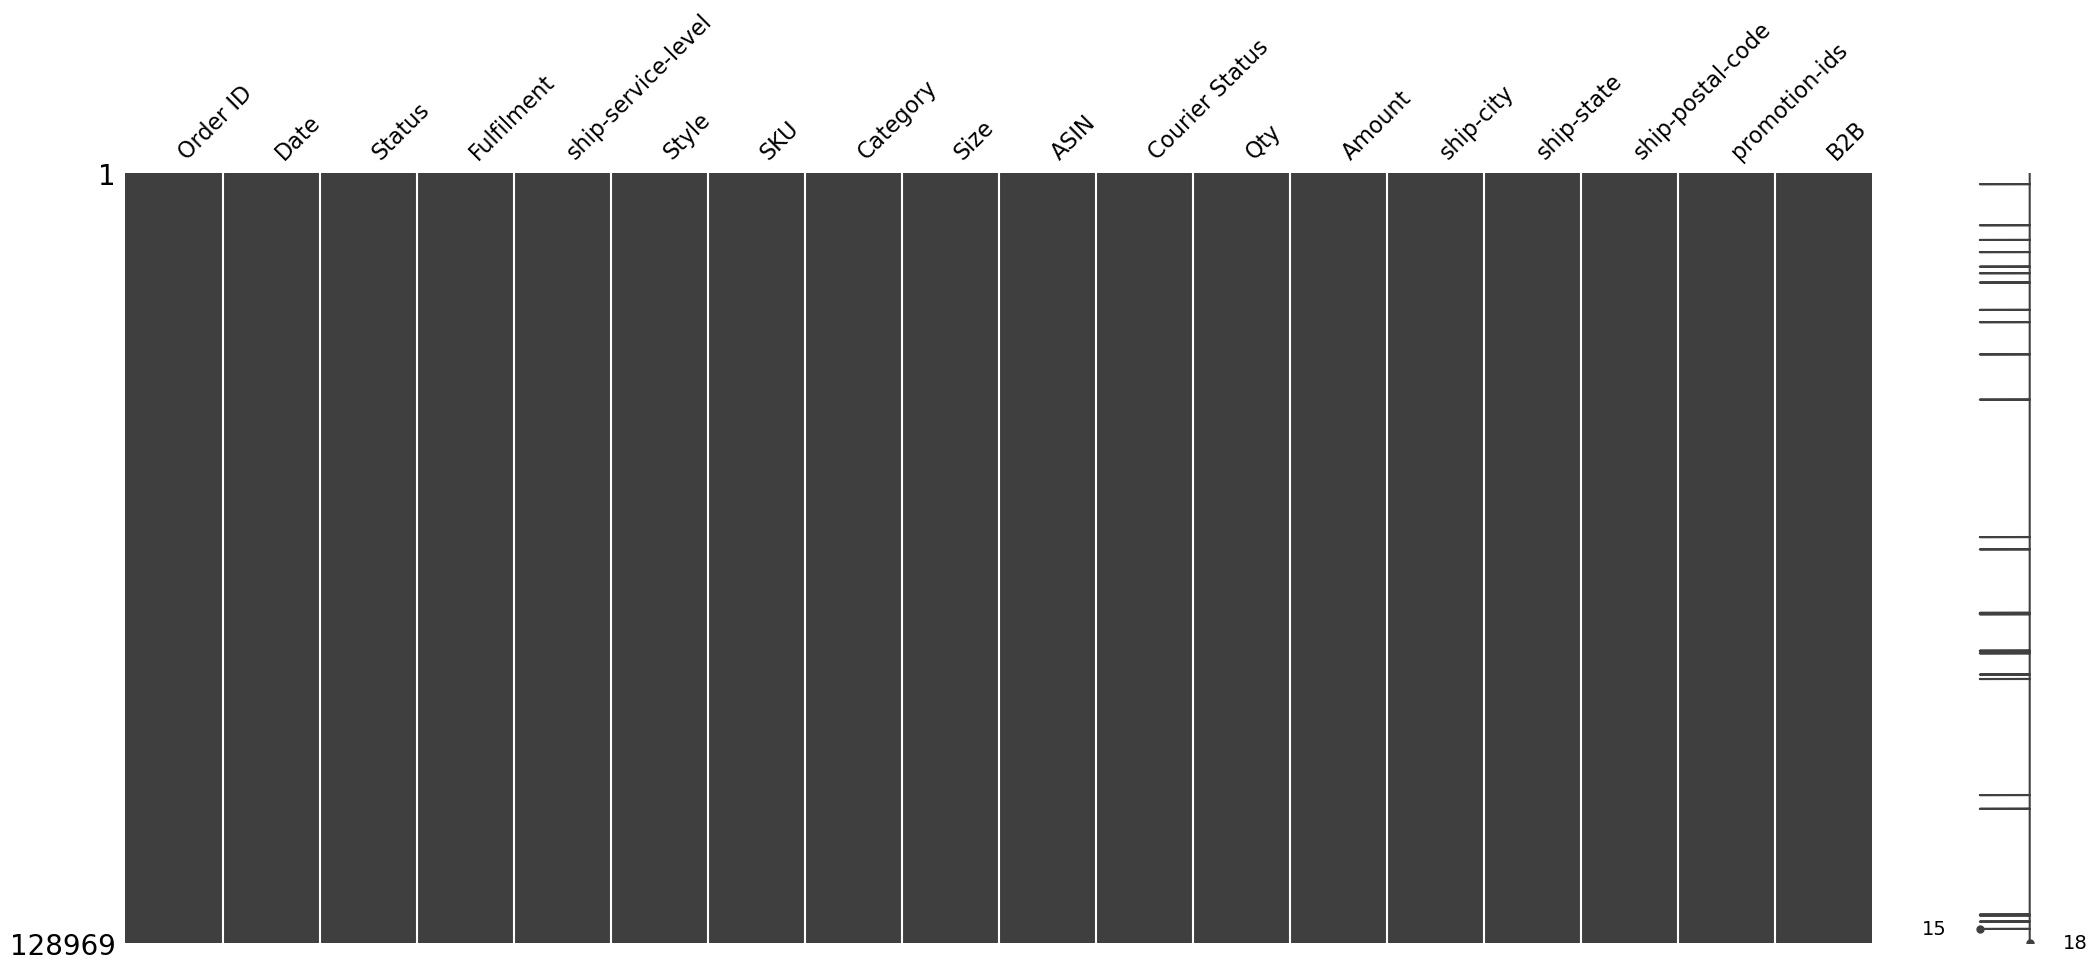

In [30]:
msno.matrix(df)

In [31]:
df[df['ship-city'].isnull()]


,Order ID,Date,Status,Fulfilment,ship-service-level,Style,SKU,Category,Size,ASIN,Courier Status,Qty,Amount,ship-city,ship-state,ship-postal-code,promotion-ids,B2B
index,,,,,,,,,,,,,,,,,,
1871,404-0566904-4825137,04-29-22,Shipped,Amazon,Expedited,J0301,J0301-TP-L,Top,L,B099S6795L,Shipped,1,493.0,NaN,NaN,NaN,IN Core Free Shipping 2015/04/08 23-48-5-108,False
1872,404-0566904-4825137,04-29-22,Shipped,Amazon,Expedited,JNE3697,JNE3697-KR-L,kurta,L,B09811Y7WM,Shipped,1,458.0,NaN,NaN,NaN,IN Core Free Shipping 2015/04/08 23-48-5-108,False
8752,406-4003386-8768363,04-25-22,Shipped,Amazon,Expedited,JNE3376,JNE3376-KR-M,kurta,M,B082W7HW86,Shipped,1,432.0,NaN,NaN,NaN,no promotion,False
11215,402-0107720-7057168,04-23-22,Shipped,Amazon,Expedited,J0003,J0003-SET-S,Set,S,B0894X27FC,Shipped,1,654.0,NaN,NaN,NaN,IN Core Free Shipping 2015/04/08 23-48-5-108,False
13252,407-4532637-8415521,04-22-22,Cancelled,Merchant,Standard,JNE3405,JNE3405-KR-S,kurta,S,B081WX4G4Q,unknown,0,380.0,NaN,NaN,NaN,no promotion,False
15688,404-9229894-8608305,04-21-22,Shipped,Amazon,Expedited,JNE3510,JNE3510-KR-M,kurta,M,B08WPR5MCB,Shipped,1,442.0,NaN,NaN,NaN,IN Core Free Shipping 2015/04/08 23-48-5-108,False
16787,402-4919636-4333150,04-20-22,Shipped - Delivered to Buyer,Merchant,Standard,JNE1233,JNE1233-BLUE-KR-031-XXXL,kurta,3XL,B07GPGP46N,Shipped,1,376.0,NaN,NaN,NaN,Amazon PLCC Free-Financing Universal Merchant ...,False
18351,405-4927647-8064368,04-19-22,Shipped,Amazon,Expedited,J0230,J0230-SKD-XS,Set,XS,B08XNHXSFZ,Shipped,1,1112.0,NaN,NaN,NaN,IN Core Free Shipping 2015/04/08 23-48-5-108,False
22930,402-8628677-0457954,04-16-22,Shipped - Returned to Seller,Merchant,Standard,J0003,J0003-SET-S,Set,S,B0894X27FC,Shipped,1,654.0,NaN,NaN,NaN,Amazon PLCC Free-Financing Universal Merchant ...,False


In [32]:
df['ship-city'].fillna('unknown', inplace = True)
df['ship-state'].fillna('unknown', inplace = True)
df['ship-postal-code'].fillna('unknown', inplace = True)

<AxesSubplot:>

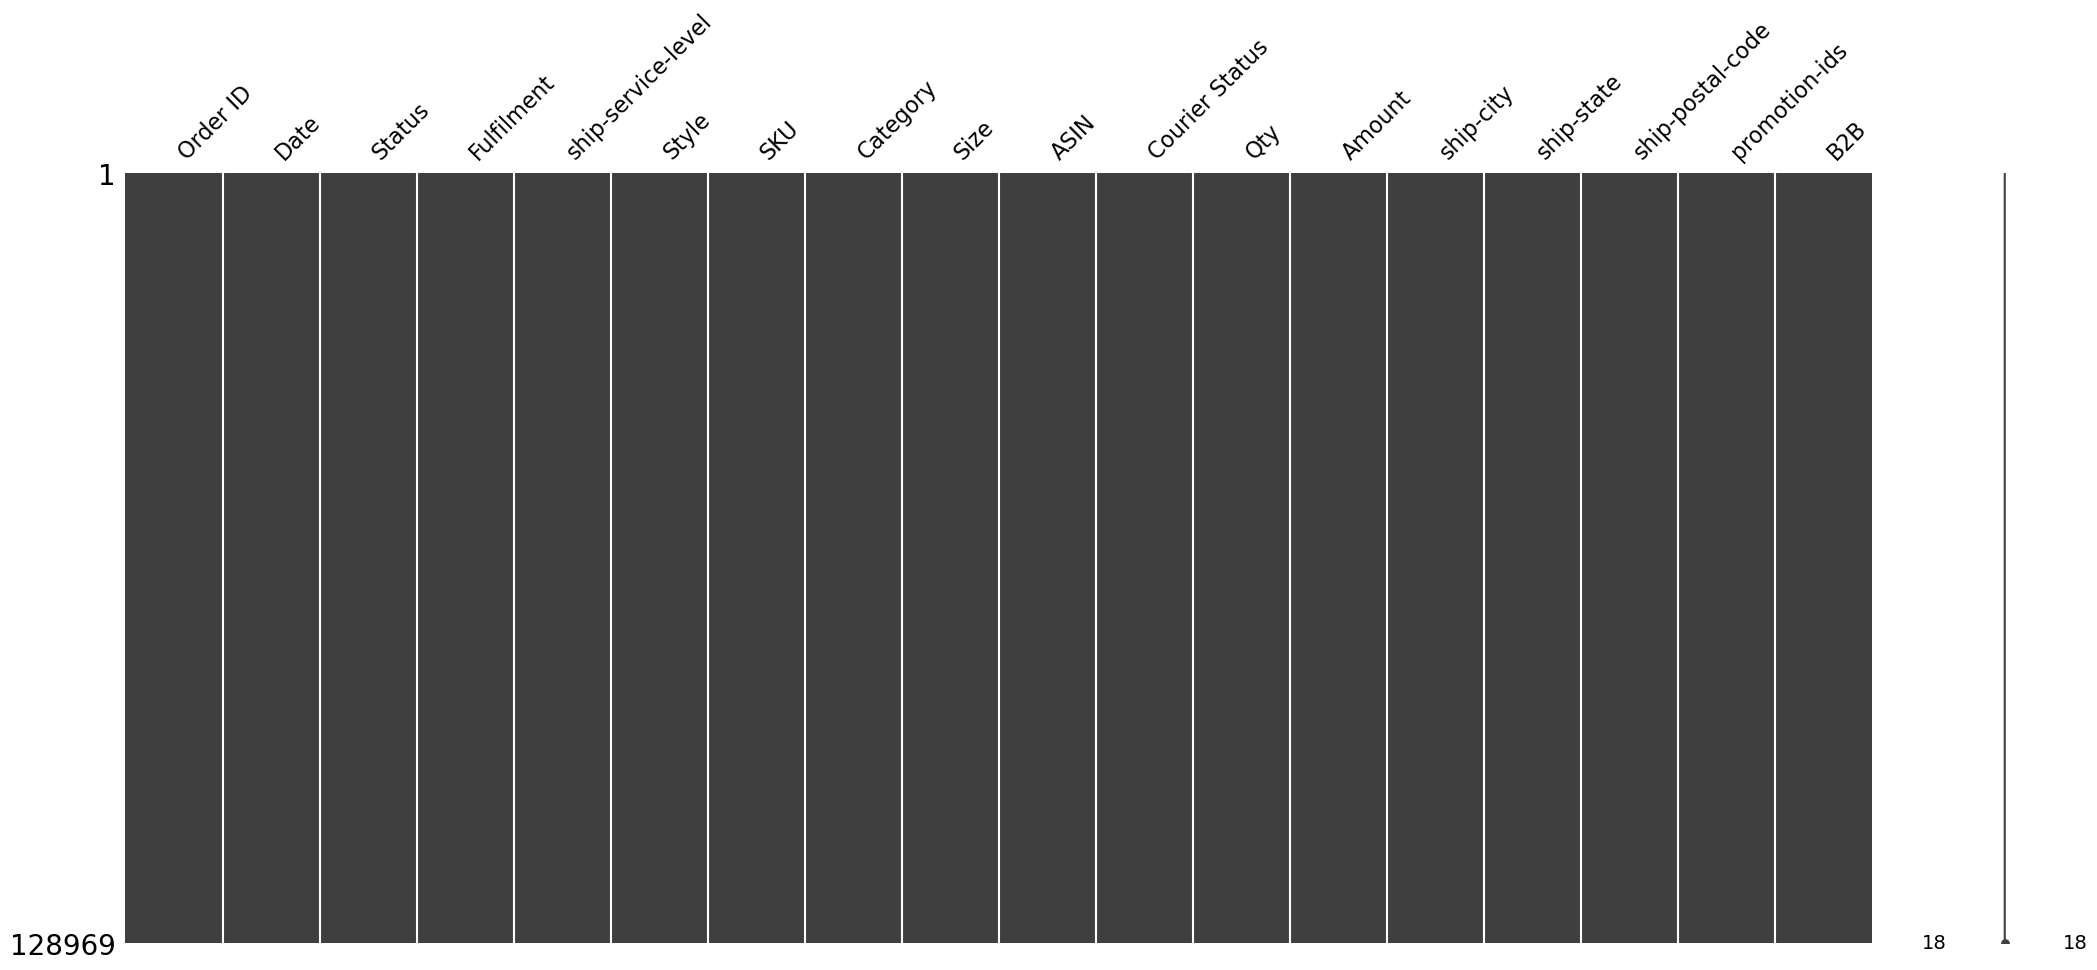

In [33]:
msno.matrix(df)


In [34]:
df.rename({'Order ID':'orderID', 'Date':'date', 'Status':'status','Fullfilment':'fullfilment', 'ship-service-level':'serviceLevel', 'Style':'style', 'SKU':'sku', 'Category':'productCategory', 'Size':'size', 'ASIN':'asin', 'Courier Status':'courier_status', 'Qty':'order_quantity', 'Amount':'order_amount (INR)', 'ship-city':'city', 'ship-state':'state', 'promotion-ids':'promotion','B2B':'customer_type'}, axis=1)


,orderID,date,status,Fulfilment,serviceLevel,style,sku,productCategory,size,asin,courier_status,order_quantity,order_amount (INR),city,state,ship-postal-code,promotion,customer_type
index,,,,,,,,,,,,,,,,,,
0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Standard,SET389,SET389-KR-NP-S,Set,S,B09KXVBD7Z,unknown,0,647.62,MUMBAI,MAHARASHTRA,400081.0,no promotion,False
1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Standard,JNE3781,JNE3781-KR-XXXL,kurta,3XL,B09K3WFS32,Shipped,1,406.00,BENGALURU,KARNATAKA,560085.0,Amazon PLCC Free-Financing Universal Merchant ...,False
2,404-0687676-7273146,04-30-22,Shipped,Amazon,Expedited,JNE3371,JNE3371-KR-XL,kurta,XL,B07WV4JV4D,Shipped,1,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN Core Free Shipping 2015/04/08 23-48-5-108,True
3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Standard,J0341,J0341-DR-L,Western Dress,L,B099NRCT7B,unknown,0,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,no promotion,False
4,407-1069790-7240320,04-30-22,Shipped,Amazon,Expedited,JNE3671,JNE3671-TU-XXXL,Top,3XL,B098714BZP,Shipped,1,574.00,CHENNAI,TAMIL NADU,600073.0,no promotion,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128970,406-6001380-7673107,05-31-22,Shipped,Amazon,Expedited,JNE3697,JNE3697-KR-XL,kurta,XL,B098112V2V,Shipped,1,517.00,HYDERABAD,TELANGANA,500013.0,no promotion,False
128971,402-9551604-7544318,05-31-22,Shipped,Amazon,Expedited,SET401,SET401-KR-NP-M,Set,M,B09VC6KHX8,Shipped,1,999.00,GURUGRAM,HARYANA,122004.0,IN Core Free Shipping 2015/04/08 23-48-5-108,False
128972,407-9547469-3152358,05-31-22,Shipped,Amazon,Expedited,J0157,J0157-DR-XXL,Western Dress,XXL,B0982YZ51B,Shipped,1,690.00,HYDERABAD,TELANGANA,500049.0,no promotion,False


In [35]:
df.head()

,Order ID,Date,Status,Fulfilment,ship-service-level,Style,SKU,Category,Size,ASIN,Courier Status,Qty,Amount,ship-city,ship-state,ship-postal-code,promotion-ids,B2B
index,,,,,,,,,,,,,,,,,,
0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Standard,SET389,SET389-KR-NP-S,Set,S,B09KXVBD7Z,unknown,0,647.62,MUMBAI,MAHARASHTRA,400081.0,no promotion,False
1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Standard,JNE3781,JNE3781-KR-XXXL,kurta,3XL,B09K3WFS32,Shipped,1,406.00,BENGALURU,KARNATAKA,560085.0,Amazon PLCC Free-Financing Universal Merchant ...,False
2,404-0687676-7273146,04-30-22,Shipped,Amazon,Expedited,JNE3371,JNE3371-KR-XL,kurta,XL,B07WV4JV4D,Shipped,1,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN Core Free Shipping 2015/04/08 23-48-5-108,True
3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Standard,J0341,J0341-DR-L,Western Dress,L,B099NRCT7B,unknown,0,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,no promotion,False
4,407-1069790-7240320,04-30-22,Shipped,Amazon,Expedited,JNE3671,JNE3671-TU-XXXL,Top,3XL,B098714BZP,Shipped,1,574.00,CHENNAI,TAMIL NADU,600073.0,no promotion,False


df.head()